In [7]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split

mnist=fetch_openml('mnist_784',as_frame=False)
X=mnist.data
Y=mnist.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=10_000)

In [11]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

32.2 s ± 1.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit forest=RandomForestClassifier().fit(x_train,y_train)

31.6 s ± 418 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
forest=RandomForestClassifier().fit(x_train,y_train)

In [19]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)

1min 23s ± 900 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%timeit forest_pca=RandomForestClassifier().fit(x_train_pca,y_train)

1min 28s ± 1.51 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
forest_pca=RandomForestClassifier().fit(x_train_pca,y_train)

In [42]:
forest.score(x_test,y_test)

0.9728

In [44]:
forest_pca.score(pca.transform(x_test),y_test)

0.9535

In [50]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier(random_state=42)

In [54]:
sgd.fit(x_train,y_train)
sgd.score(x_test,y_test)

0.8467

In [55]:
sgd.fit(x_train_pca,y_train)
sgd.score(pca.transform(x_test),y_test)

0.885

In [142]:
from sklearn.manifold import TSNE

t_x=x_train[:5000]
t_y=y_train[:5000]

tsne=TSNE(init="random", learning_rate="auto",
            random_state=42)
tt_x=tsne.fit_transform(t_x)

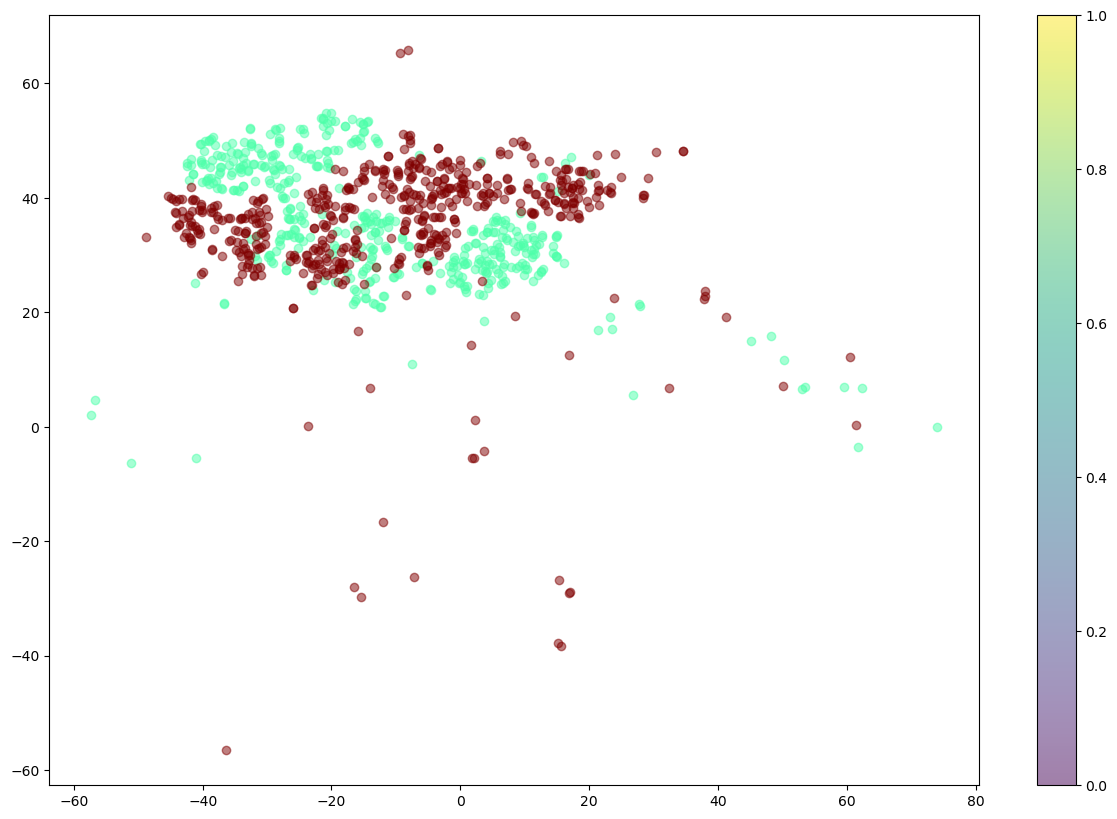

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
for x in ['4','9']:
    scat=plt.scatter(tt_x[t_y==x,0],tt_x[t_y==x,1],c=[cmap(float(x) / 9)],alpha=0.5,)
plt.colorbar()

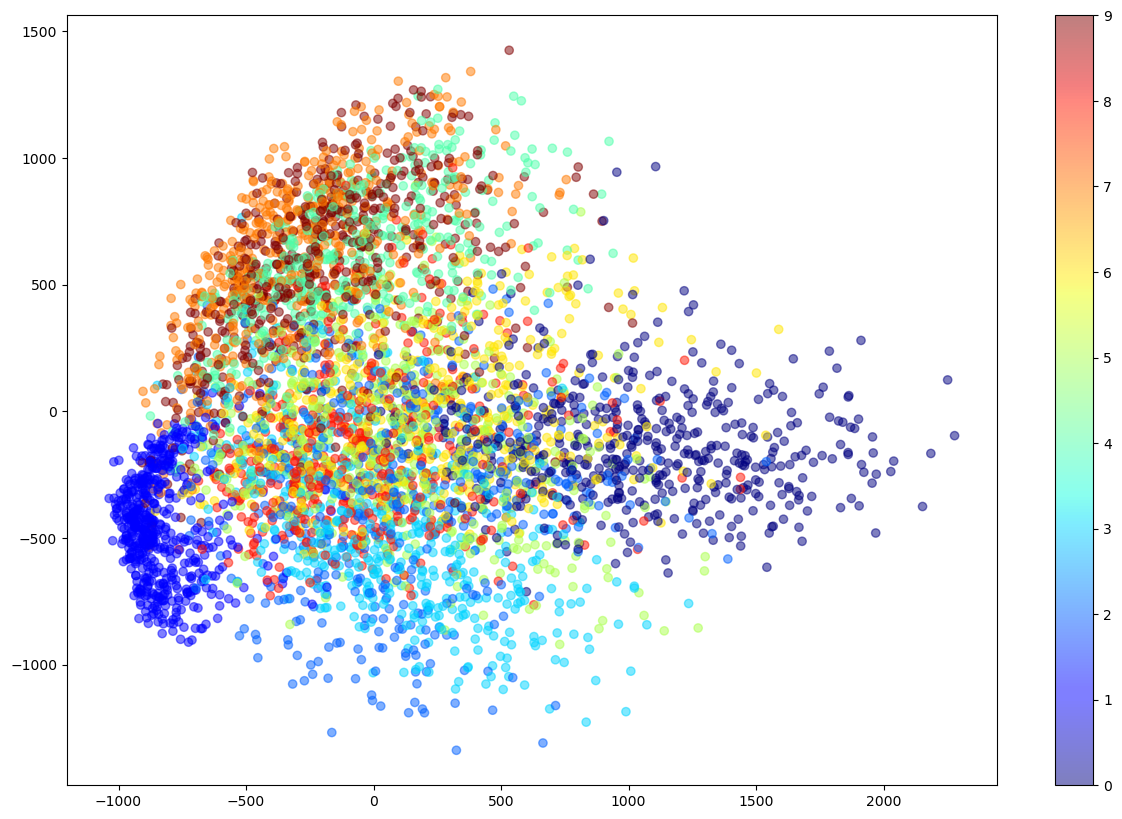

In [126]:
pca=PCA(n_components=2)
pca_x=pca.fit_transform(t_x)

plt.figure(figsize=[15,10])
scat=plt.scatter(pca_x[:,0],pca_x[:,1],c=t_y.astype('int'),cmap='jet',alpha=0.5,)
plt.colorbar()

In [ ]:
np.percentile()

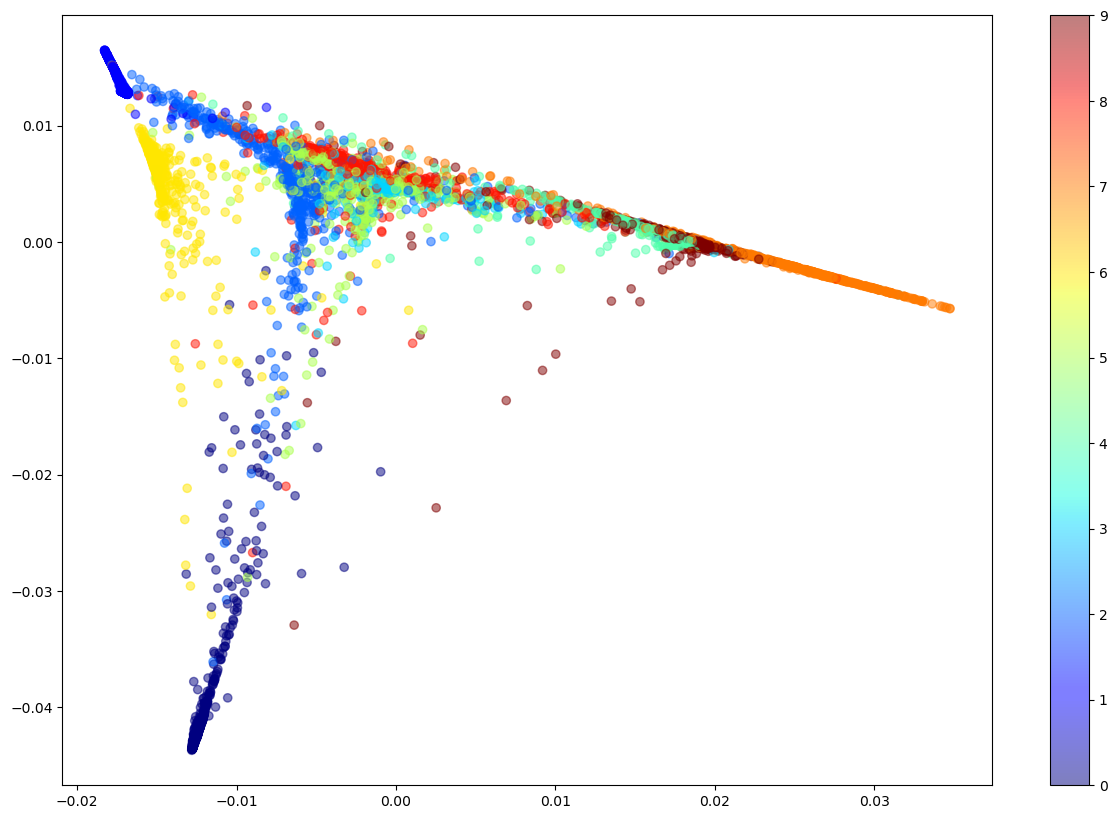

In [128]:
from sklearn.manifold import LocallyLinearEmbedding

lle=LocallyLinearEmbedding()
lle_x=lle.fit_transform(t_x)

plt.figure(figsize=[15,10])
scat=plt.scatter(lle_x[:,0],lle_x[:,1],c=t_y.astype('int'),cmap='jet',alpha=0.5,)
plt.colorbar()